In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# data = load_boston()
df = pd.DataFrame(load_boston()['data'],columns=load_boston()['feature_names'])

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
titanic_dataframe = sns.load_dataset('titanic')

In [10]:
raw = titanic_dataframe

In [11]:
raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
len(raw.groupby(['embarked','class']).count().loc[:,'survived'].index)
# for i in raw.groupby(['embarked','class']).count().loc[:,'survived'].index:
#     print(i[0],i[1])

9

In [61]:
dd = raw.groupby(['embarked','class','who']).mean().loc[:,'survived']
k = int(np.round(np.sqrt(len(dd.index)),0))

In [109]:
# for 
dd.reset_index()
d3 = dd.reset_index().pivot_table(values = 'survived' , index = ['embarked','class'],columns = 'who').fillna(0)

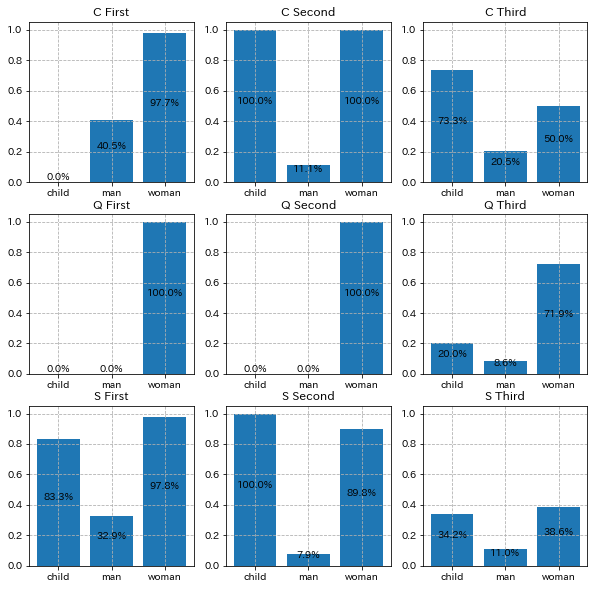

In [116]:
# d3.index
plt.figure(figsize=(10, 10))
# fig = plt.figure()
seg = d3.index
k = int(np.round(np.sqrt(len(d3.index)),0))
for i in range(len(seg)):
    plt.subplot(k,k,i+1)
    plt.title('{} {}'.format(seg[i][0],seg[i][1]))
    plt.bar(d3.loc[seg[i]].index,d3.loc[seg[i]].values)
    plt.ylim(0,1.05)
    plt.grid(linestyle='--')
    for ind,x in enumerate(d3.loc[seg[i]].index):
#         print(ind)
        plt.text(
                x = ind,
                y = d3.loc[seg[i]].values[ind]/2, 
                s = '{:.1f}%'.format(d3.loc[seg[i]].values[ind]*100), 
                ha = 'center', 
                va = 'bottom'
                )


In [106]:
d3.loc[seg[i]].values[ind]

0.38571428571428573

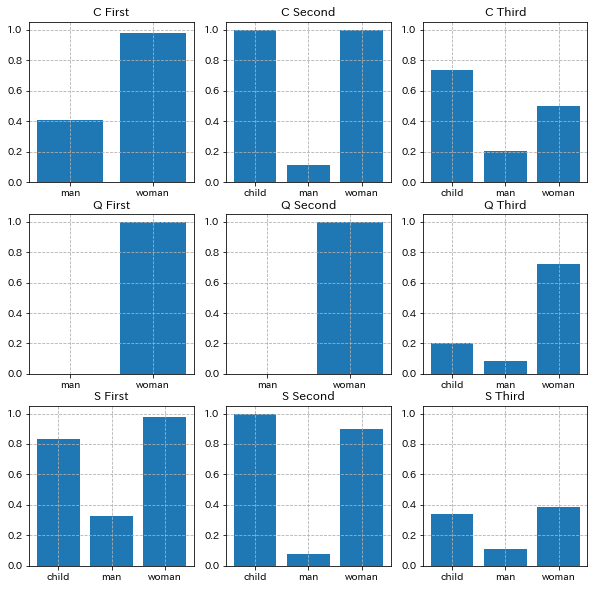

In [99]:
fig, axes = plt.subplots(k, k, figsize=(10,10))
# fig.set_label('区分')
# fig.set_title('ああああ')
for i in range(len(seg)):
    r = i//k + 1-1
    c = np.mod(i,k) + 1-1
#         axes[i][j].plot(t, l[i][j])
    axes[r][c].bar(d3.loc[seg[i]].index,d3.loc[seg[i]].values)
    axes[r][c].set_title('{} {}'.format(seg[i][0],seg[i][1]))
    axes[r][c].set_ylim(0, 1.05)
    axes[r][c].grid(linestyle='--')
#         axes[i][j].set_xlim(-np.pi, np.pi)



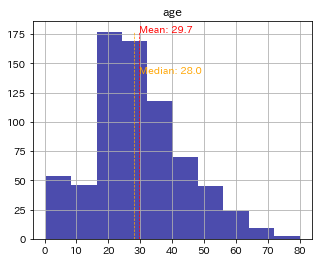

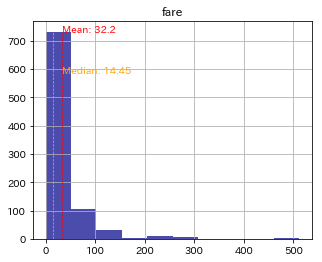

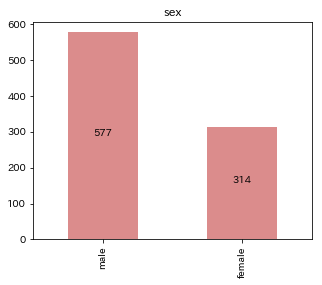

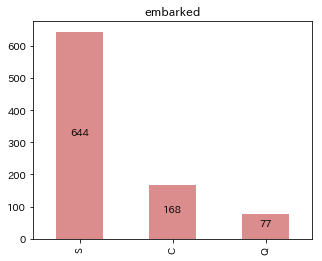

In [10]:
def num_vis(data):
    data.hist(figsize=(5, 4), color='darkblue', alpha=.7)
    mean = data.mean()
    median = data.median()
    ymax = pd.cut(data, 10).value_counts().max()
    plt.vlines(x=mean, ymin=0, ymax=ymax, colors='red', linestyles='--', lw=.7)# 平均値の直線追加
    plt.annotate('Mean: {}'.format(round(mean, 2)),xy=(mean, ymax), color='red')
    plt.vlines(x=median, ymin=0, ymax=ymax, colors='orange', linestyles='--', lw=.7)# 中央値の直線追加
    plt.annotate('Median: {}'.format(round(median, 2)),xy=(mean, ymax*0.8), color='orange')
    plt.title(data.name)
    plt.show()

# カテゴリデータ用カウントプロット
def cut_vis(data):
    t = data.value_counts()
    t.plot.bar(figsize=(5, 4), color='indianred', alpha=.7)
    for i in range(len(t)):
        plt.annotate(t[i], xy=(i, t[i]/2), ha='center')#haでannotatioinのテキストを中央寄せ
    plt.title(data.name)   
    plt.show()

# 関数を各変数へ適用
num_vis(raw['age'])
num_vis(raw['fare'])

# cut_vis(raw['Label'])
cut_vis(raw['sex'])
cut_vis(raw['embarked'])

In [117]:
raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [124]:
d = raw.groupby(['embarked','class','sex']).mean()['survived'].reset_index()
d2 = d.pivot_table(index=['embarked','class'],columns = 'sex',values = d.columns[-1])

In [125]:
d2

sex                female      male
embarked class                     
C        First   0.976744  0.404762
         Second  1.000000  0.200000
         Third   0.652174  0.232558
Q        First   1.000000  0.000000
         Second  1.000000  0.000000
         Third   0.727273  0.076923
S        First   0.958333  0.354430
         Second  0.910448  0.154639
         Third   0.375000  0.128302

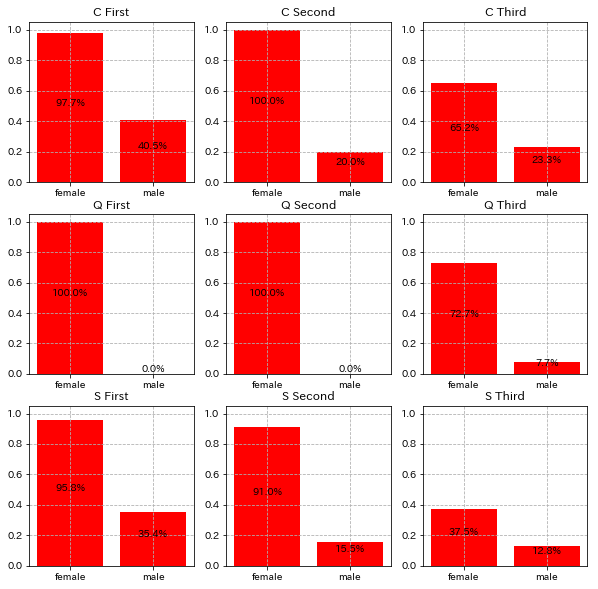

In [149]:
k = int(np.sqrt(len(d2.index) + 1))
fig,axes = plt.subplots(k ,k ,figsize = (10,10))
for i ,ind in enumerate(d2.index):
    r = i//k + 1-1
    c = np.mod(i,k) + 1-1
    axes[r][c].bar(d2.loc[ind].index ,d2.loc[ind].values,color = 'red')
    axes[r][c].set_ylim(0,1.05)
    axes[r][c].set_title('{} {}'.format(ind[0],ind[1]))
    axes[r][c].grid(linestyle='--')
    for j ,jnd in enumerate(d2.loc[ind].index):
        x = j
        y = (d2.loc[ind].loc[jnd])/2
        s = '{:.1f}%'.format(y*100*2)
        axes[r][c].text(x= x,y= y,s= s
                        ,color='black'
                        ,ha = 'center'
                        ,va = 'bottom'
                       )

## 箱ひげ図

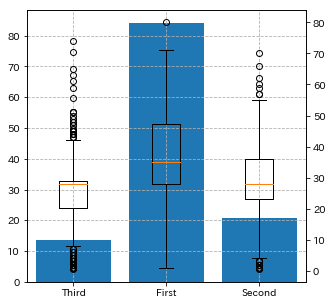

In [232]:
tmp = raw.loc[:,['class','age','fare']]
tmp['age'] = tmp['age'].fillna(np.median(tmp['age'].dropna()))
tmp['fare'] = tmp['fare'].fillna(np.median(tmp['fare'].dropna()))
# type(np.median(raw['age'].dropna()))
# plt.boxplot(tmp[tmp['class']=='First']['age'].tolist())

fig,axes = plt.subplots(figsize = (5,5))
l = list()
ln = list()
# for i in tmp['class'].unique():
for i in tmp['class'].unique().sort_values():
    l.append(tmp[tmp['class']==i]['age'].tolist())
#     l = l + list(tmp[tmp['class']==i]['age'].tolist())
    ln.append(i)

# 2軸設定
axes2 = axes.twinx()
tmp2 = tmp.groupby('class').mean()['fare']
axes.bar([j+1 for j in range(len(ln))],tmp2.loc[ln])
axes2.boxplot(l)

axes.set_xticklabels(ln)
axes.grid(linestyle = '--')

# axes.set_xticklabels(ln)

In [201]:
import seaborn as sns

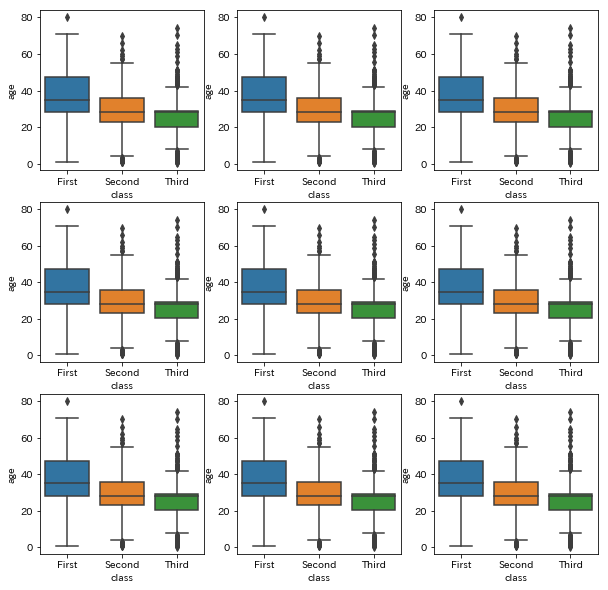

In [238]:
# seabornでsubplotする時は、引数:'ax='で追加
fig ,axes = plt.subplots(3,3,figsize = (10,10)) 
for i in range(3*3):
    x = i//3 
    y = np.mod(i,3)
    sns.boxplot(x = 'class',y = 'age', data = tmp ,ax = axes[x][y] )

## 散布図

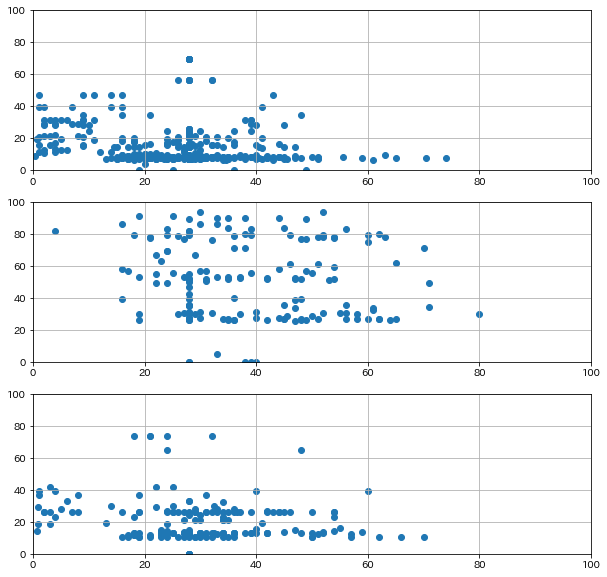

In [263]:
l = tmp['class'].unique()
fig ,axes = plt.subplots(len(l),1,figsize = (10,10))
for i ,cl in enumerate(l):
    tmptmp = tmp[tmp['class'] == cl].reset_index(drop=True)
    r = i
#     axes[r][1].scatter(tmptmp['age'].values,tmptmp['fare'].values)
    axes[r].scatter(tmptmp['age'].values,tmptmp['fare'].values)
    axes[r].set_xlim(0,100)
    axes[r].set_ylim(0,100)
    axes[r].grid(True)

#     plt.scatter(tmp.age,tmp.fare)

C:\Users\aquar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

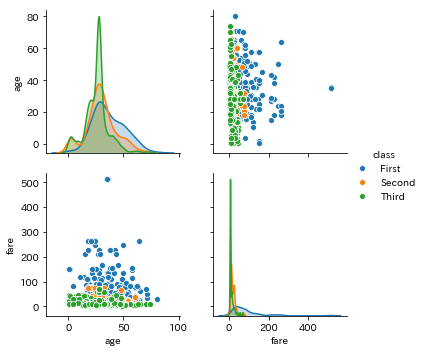

In [268]:
plt.figure(figsize = (10,10))
sns.pairplot(tmp,hue = 'class')

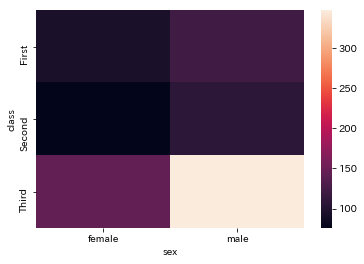

In [274]:
sns.heatmap(pd.crosstab(raw.loc[:,'class'],raw.loc[:,'sex']))
# raw.head()

In [275]:
print('aaa')

aaa
